In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import load_model
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Change the directory to the dataset in drive folder
path= '/content/drive/MyDrive/brain_tumor.h5'

# Load All Models
model = load_model(path)

Mounted at /content/drive


Saving b510dc0d5cd3906018c4dd49b98643.jpg to b510dc0d5cd3906018c4dd49b98643.jpg


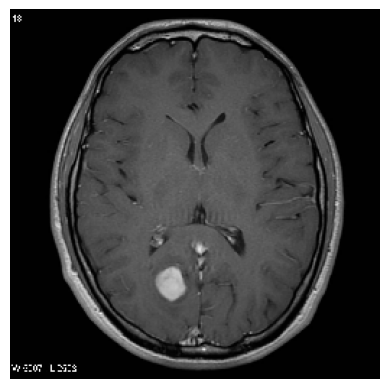

1/1 [==============================] - 1s 1s/step
[[1.]]
Tumor


In [3]:
uploaded = files.upload()

for fn in uploaded.keys():
  # Predict the images that have been uploaded
  path = fn
  img =  tf.keras.utils.load_img(path, target_size=(256,256)) # Need to match our model input size
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
  x = tf.keras.utils.img_to_array(img) # Change the image into array
  x = np.expand_dims(x, axis=0) # Expand the array shape

  images = np.vstack([x])
  classes = model.predict(images) # Predict using the model
  print(classes)
  result_pred = tf.where(classes < 0.7, 0, 1)
  if result_pred == 1:
    print('Tumor')
  else:
    print('normal')